In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

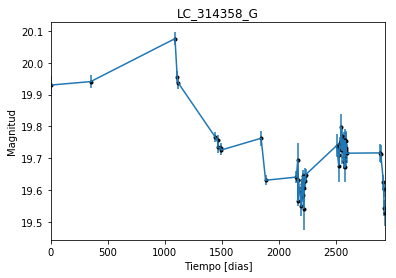

In [2]:
data = np.genfromtxt('LC_314358_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_314358_G')
plt.savefig("LC_314358_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

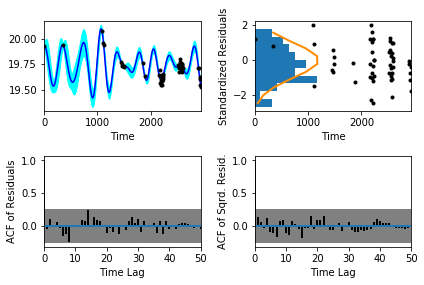

In [5]:
sample.assess_fit()

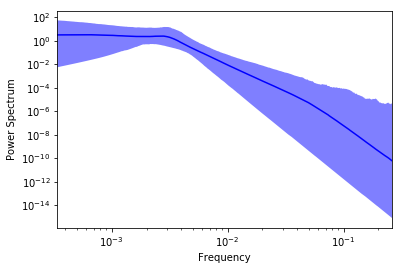

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

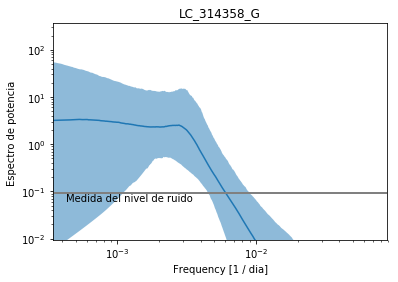

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_314358_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_314358_G')

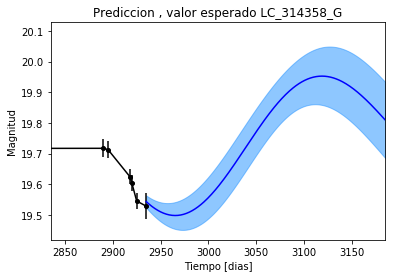

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_314358_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_314358_G')

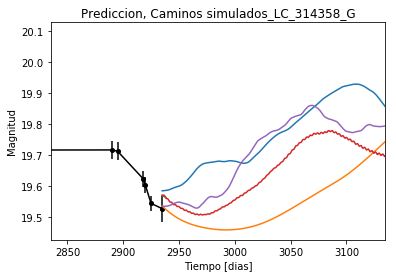

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_314358_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


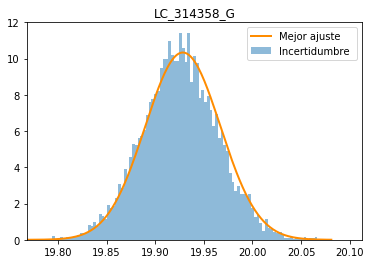

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_314358_G')
plt.savefig("Mejor_ajuste_LC_314358_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_314358_G')

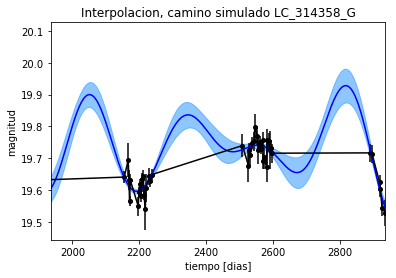

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_314358_G')

Text(0.5,1,'Interpolacion, camino simulado LC_314358_G')

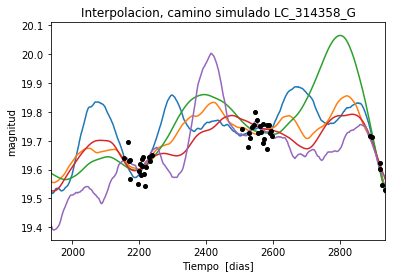

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_314358_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 488.784843978
Median: 0.00172136585554
Standard deviation: 0.0710392306925
68% credibility interval: [ 0.00049798  0.03164811]
95% credibility interval: [ 0.00036012  0.27314007]
99% credibility interval: [  3.46516189e-04   4.48423261e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 7041.68607274
Median: 0.00123594474563
Standard deviation: 0.0360785507819
68% credibility interval: [ 0.00047185  0.01107402]
95% credibility interval: [ 0.0003556   0.13262892]
99% credibility interval: [ 0.00034516  0.25998331]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 2229.84277368
Median: 0.00650413340765
Standard deviation: 0.1139

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 400.1572883
Median: 115.138407315
Standard deviation: 2.09102770739
68% credibility interval: [ 113.02624314  117.11062627]
95% credibility interval: [ 110.21987513  118.42141401]
99% credibility interval: [ 108.15291846  119.2455086 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 440.900331684
Median: 0.199487105584
Standard deviation: 0.94349003485
68% credibility interval: [ 0.02744679  1.46421388]
95% credibility interval: [ 0.01171087  3.30194985]
99% credibility interval: [ 0.0101802   4.18663268]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 517.376859916
Median: 0.0472846294707
Standard deviation: 1.70774238051
68% credibility interval: [  1.48922748e-03   1.53697407e+00]
95% credibility interval: [  6.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 878.346276198
Median: 1.63608025249e-20
Standard deviation: 1.63680473646e+65
68% credibility interval: [  1.55384688e-55   1.60974349e+15]
95% credibility interval: [  1.86819482e-79   2.26028880e+50]
99% credibility interval: [  6.43133875e-85   1.29524627e+63]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2081.36028734
Median: 19.7727997715
Standard deviation: 0.0730044168267
68% credibility interval: [ 19.71735136  19.83507246]
95% credibility interval: [ 19.63779244  19.92773131]
99% credibility interval: [ 19.53667672  20.02347856]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 276.399087972
Median: 0.0038955876662
Standard deviation: 0.108242054217
68% credibility interval: [ 0.00127593  0.15195085]
95% credibility interval: [ 0.          0.38089955]
99% credibility interval: [ 0.         0.4871181]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 276.399087972
Median: 0.0038955876662
Standard deviation: 0.108242054217
68% credibility interval: [ 0.00127593  0.15195085]
95% credibility interval: [ 0.          0.38089955]
99% credibility interval: [ 0.         0.4871181]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 235.447527814
Median: 0.0
Standard deviation: 0.00128499941371
68% credibi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 400.1572883
Median: 115.138407315
Standard deviation: 2.09102770739
68% credibility interval: [ 113.02624314  117.11062627]
95% credibility interval: [ 110.21987513  118.42141401]
99% credibility interval: [ 108.15291846  119.2455086 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 637.71858098
Median: 0.0292917377904
Standard deviation: 0.0390548945869
68% credibility interval: [ 0.01806407  0.05357383]
95% credibility interval: [ 0.01212464  0.12234214]
99% credibility interval: [ 0.00939704  0.24760607]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1426.35974455
Median: 1.07953174983
Standard deviation: 0.166118754875
68% credibility interval: [ 0.93877076  1.25679257]
95% credibility interval: [ 0.81436515  1.46599759]
99% credibility interval: [ 0.74778555  1.61893028]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1054.77149787
Median: 1.95898946709e-05
Standard deviation: 0.00333937289289
68% credibility interval: [  1.96247167e-20   8.23721660e-04]
95% credibility interval: [  9.39700219e-56   6.01133173e-03]
99% credibility interval: [  1.37632593e-68   2.03044131e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 488.784843978
Median: (-0.0108156606518-0.154743011214j)
Standard deviation: 0.813494525355
68% credibility interval: [-0.19885096+0.j         -0.00312889-1.72968582j]
95% credibility interval: [-1.71618966+0.j         -0.00226267-0.01854353j]
99% credibility interval: [ -2.81752644e+00-2.03585013j  -2.17722542e-03-0.01938772j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 7041.68607274
Median: (-0.00776566986622+0.0266479304718j)
Standard deviation: 0.716889254574
68% credibility interval: [-0.0695801+0.32448536j -0.0029647+0.01772957j]
95% credibility interval: [-0.83333205+0.j         -0.00223430+0.02362916j]
99% credibility interval: [-1.63352334+1.7838432j  -0.00216869+0.02036376j]
Posterior summary for paramete